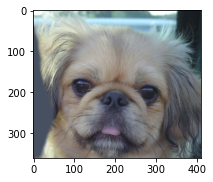

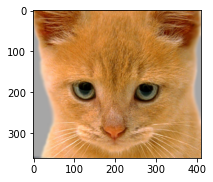

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import torch
import numpy as np
import scipy.misc

from proj1_6320.proj1_code.utils import load_image, save_image

%matplotlib inline
%load_ext autoreload
%autoreload 2

image1 = load_image('proj1_6320/data/1a_dog.bmp')
image2 = load_image('proj1_6320/data/1b_cat.bmp')

# display the dog and cat images
plt.figure(figsize=(3,3)); plt.imshow((image1*255).astype(np.uint8));
plt.figure(figsize=(3,3)); plt.imshow((image2*255).astype(np.uint8));

(361, 410, 3)
(361, 410, 3)


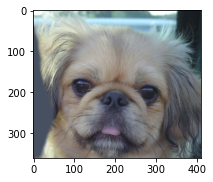

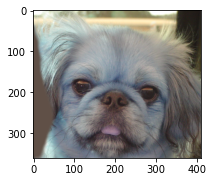

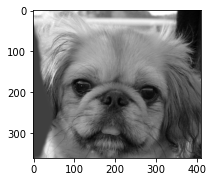

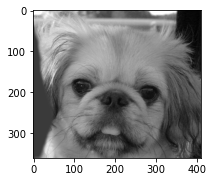

In [3]:
print(image1.shape)
image1_red = image1[:,:,0]
image1_green = image1[:,:,1]
image1_blue = image1[:,:,2]
M1rb = image1.copy()
M1rb[:,:,0] = image1_blue
M1rb[:,:,1] = image1_green
M1rb[:,:,2] = image1_red
print(M1rb.shape)
plt.figure(figsize=(3,3)); plt.imshow((image1*255).astype(np.uint8))
plt.figure(figsize=(3,3)); plt.imshow((M1rb*255).astype(np.uint8))
plt.figure(figsize=(3,3)); plt.imshow((image1_green), cmap='gray')
plt.figure(figsize=(3,3)); plt.imshow((image1_red), cmap='gray')
M1g = image1_green
M1r = image1_red
M1b = image1_blue

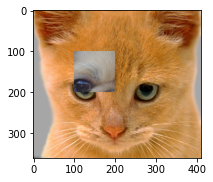

In [19]:
image2[100:200, 100:200, :] = image1[100:200, 100:200, :]
plt.figure(figsize=(3,3)); plt.imshow((image2*255).astype(np.uint8))


In [26]:
print("Mean:", np.mean(M1g),"| STD:", np.std(M1g), "| Max:", np.max(M1g))

Mean: 0.48815045 | STD: 0.20117572 | Max: 1.0


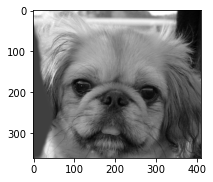

In [25]:
M1g_ = ((M1g - np.mean(M1g))/np.std(M1g)) * 0.05 + np.mean(M1g)
plt.figure(figsize=(3,3)); plt.imshow((M1g_), cmap='gray')

(361, 370)


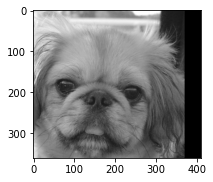

In [5]:
sv = 40
M1g_shift = np.zeros(M1g.shape)
print(M1g_shift[:,sv:].shape)
M1g_shift[:,:-sv] = M1g[:,sv:]
plt.figure(figsize=(3,3)); plt.imshow((M1g_shift), cmap='gray')

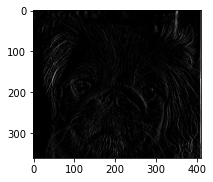

In [64]:
M1g_shift2 = M1g - M1g_shift
M1g_shift2[M1g_shift2 < 0] = 0
plt.figure(figsize=(3,3)); plt.imshow((M1g_shift2), cmap='gray')

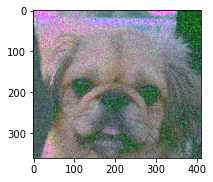

In [71]:
image_ = image1.copy()
image_[:,:,1] = np.random.normal(0, 0.2, image_[:,:,1].shape) + image_[:,:,1]
plt.figure(figsize=(3,3)); plt.imshow((image_*255).astype(np.uint8))

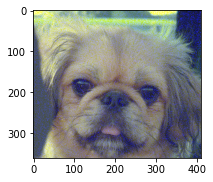

In [76]:
image_ = image1.copy()
image_[:,:,2] = np.random.normal(0, 0.2, image_[:,:,2].shape) + image_[:,:,2]
plt.figure(figsize=(3,3)); plt.imshow((image_*255).astype(np.uint8))

In [2]:
def get_scaling_matrix(scale_x, scale_y):
    """Generaete scaling transformation matrix"""
    '''
        Input:
            scale_x: scaling factor along x axis
            scale_y: scaling factor along y axis
        Output: 
            scaling_matrix: 3x3 matrix
    '''
    output = np.eye(3)
    output[0,0] = scale_x
    output[1,1] = scale_y
    return output

print(get_scaling_matrix(1.2,2))
    

[[1.2 0.  0. ]
 [0.  2.  0. ]
 [0.  0.  1. ]]


In [3]:
def get_rotation_matrix(rot_angle_degree):
    """Generaete rotation transformation matrix"""
    '''
        Input:
            rot_angle_degree: rotation angle in degree
        Output: 
            rotation_matrix: 3x3 matrix
    '''
    output = np.eye(3)
    cost = np.cos(np.deg2rad(rot_angle_degree))
    sint = np.sin(np.deg2rad(rot_angle_degree))
    output[0,0] = cost
    output[1,1] = cost
    output[0,1] = -sint
    output[1,0] = sint
    return output

print(get_rotation_matrix(30))


[[ 0.8660254 -0.5        0.       ]
 [ 0.5        0.8660254  0.       ]
 [ 0.         0.         1.       ]]


In [4]:
def get_translation_matrix(delta_x, delta_y):
    """Generaete scaling transformation matrix"""
    '''
        Input:
            delta_x: movement along x axis
            delta_y: movement along y axis
        Output: 
            translation_matrix: 3x3 matrix
    '''
    output = np.eye(3)
    output[0,2] = delta_x
    output[1,2] = delta_y
    return output

print(get_translation_matrix(1.2,2))


[[1.  0.  1.2]
 [0.  1.  2. ]
 [0.  0.  1. ]]


In [5]:
from skimage.transform import resize, rotate

def get_transform(center, scale, res, rot=0):
    """Generate transformation matrix that tranform a point in an image for image cropping"""
    ''' 
        bounding box representation:
             center: position of the bounding box center in the original image
             scale: scale = actual_bb_edge_length/200
                    thence, the shape is [200 x scale, 200 x scale]
        res: the resolution of the cropped image. It can be different from the bounding box size, and you will
             need to apply the scaling operation to make the cropped image get the 'res' resolution.
        rot: rotation angle in degress. 
        output: 3 x 3 matrix
        
        NOTE:
        - The coordinates from the original image must be rotated and mapped to the cropped imaged while also
        accounting for scaling.
        - For Example the top left corner (0,0) of the cropped image may have non-zero coordinates in the original image.
        This needs to be accounted for translation, rotation and scaling to match the target resolution.
        - Please pay attention to the order of muplication.
        - The scale of the bb is different from res. The scale defines the size of the bounding box and inturn the portion
        of the image to be cropped. The res defines the target size of the cropped image i.e. the cropped image has to be
        scaled to meet the desired res.
        - You can use the functions defined in the previous sections.
    '''
    ############################
    ### TODO: YOUR CODE HERE ###
    bb = 200 * scale
    output =  get_translation_matrix(bb/2 - center[0], bb/2 - center[1]) @ get_rotation_matrix(-rot) @ get_scaling_matrix(res[0]/bb, res[1]/bb)
    return output
    ### END OF STUDENT CODE ####
    ############################

def transform(pt, center, scale, res, rot=0, invert=0):
    """Transform pixel location to different reference."""
    '''
    NOTE:
         bounding box representation:
             center: position of the bounding box center in the original image
             scale: scale = actual_bb_edge_length/200
                    thence, the shape is [200xscale, 200xscale]
     Tranform:
         translate:
             from orig_img coord to bbox coord, if invert=0
             from bbox coord to orig_img, if invert=1
    '''
    t = get_transform(center, scale, res, rot=rot)
    #print(t)
    if invert:
        t = np.linalg.inv(t)
    new_pt = np.array([pt[0]-1, pt[1]-1, 1.]).T
    new_pt = np.dot(t, new_pt)
    return new_pt[:2].astype(int)+1

def flip_img(img):
    """Flip rgb images or masks.
    channels come last, e.g. (256,256,3).
    """
    img = np.fliplr(img)
    return img

def crop(img, center, scale, res, rot=0):
    """Crop image according to the supplied bounding box."""
    '''
     NOTE:
         bounding box representation:
             center: position of the bounding box center in the original image
             scale: scale = actual_bb_edge_length/200
                    thence, the shape is [200xscale, 200xscale]
     Tranform:
         translate:
             from orig_img coord to bbox coord, if invert=0
             from bbox coord to orig_img, if invert=1
    '''
    # Upper left point
    ul = np.array(transform([1, 1], center, scale, res, invert=1))-1
    print("ul", ul)
    # Bottom right point
    br = np.array(transform([res[0]+1,
                             res[1]+1], center, scale, res, invert=1))-1
    print("br", br)
    # Padding so that when rotated proper amount of context is included
    pad = int(np.linalg.norm(br - ul) / 2 - float(br[1] - ul[1]) / 2)
    if not rot == 0:
        ul -= pad
        br += pad

    new_shape = [br[1] - ul[1], br[0] - ul[0]]
    if len(img.shape) > 2:
        new_shape += [img.shape[2]]
    new_img = np.zeros(new_shape)

    # Range to fill new array
    new_x = max(0, -ul[0]), min(br[0], len(img[0])) - ul[0]
    new_y = max(0, -ul[1]), min(br[1], len(img)) - ul[1]
    # Range to sample from original image
    old_x = max(0, ul[0]), min(len(img[0]), br[0])
    old_y = max(0, ul[1]), min(len(img), br[1])
    new_img[new_y[0]:new_y[1], new_x[0]:new_x[1]] = img[old_y[0]:old_y[1],
                                                        old_x[0]:old_x[1]]

    if not rot == 0:
        # Remove padding
        new_img = rotate(new_img, rot)
        #new_img = scipy.skimage.transform.rotate(new_img, rot)
        new_img = new_img[pad:-pad, pad:-pad]

    new_img = resize(new_img, res)
    return new_img        

def rgb_processing(rgb_img, center, scale, res, rot, flip):
    """Process rgb image and do augmentation."""
    print("bbsize =", 200*scale)
    rgb_img = crop(rgb_img, center, scale,
                  res, rot=rot)
    # flip the image
    if flip:
        rgb_img = flip_img(rgb_img)
    #rgb_img = np.transpose(rgb_img.astype('float32'),(2,0,1))/255.0
    return rgb_img

bbsize = 200
ul [-20   5]
br [180 205]
bbsize = 200
ul [-20   5]
br [180 205]


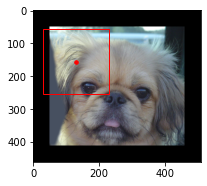

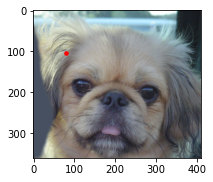

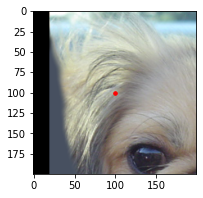

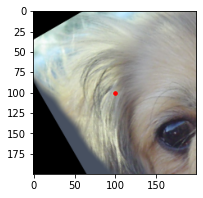

In [6]:
h,w,c=image1.shape
im1 = np.zeros([h+100,w+100,3])
im1[50:h+50,50:w+50,:] = image1
plt.figure(figsize=(3,3)); plt.imshow((im1*255).astype(np.uint8));
plt.scatter(130, 155, marker='.', color='r', s =50)
rectangle=plt.Rectangle((30,55), 200, 200, color='r', fill=False)
plt.gca().add_patch(rectangle)

plt.figure(figsize=(3,3)); plt.imshow((image1*255).astype(np.uint8));
plt.scatter(80, 105, marker='.', color='r', s =50)

im1_rot = rgb_processing(image1, [80,105], 1, [200,200], 0, 0)
plt.figure(figsize=(3,3)); plt.imshow((im1_rot*255).astype(np.uint8));
plt.scatter(100, 100, marker='.', color='r', s =50)

im1_rot = rgb_processing(image1, [80,105], 1, [200,200], 30, 0)
plt.figure(figsize=(3,3)); plt.imshow((im1_rot*255).astype(np.uint8));
plt.scatter(100, 100, marker='.', color='r', s =50)

361 410
205.0 180.5
bbsize = 224.00000000000003
ul [93 68]
br [317 292]


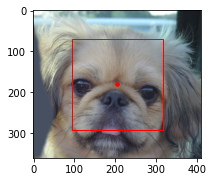

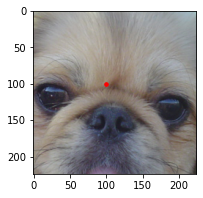

In [15]:
h,w,c=image1.shape
print(h,w)
cx, cy = (w/2, h/2)
print(cx, cy)
plt.figure(figsize=(3,3)); plt.imshow((image1*255).astype(np.uint8));
plt.scatter(cx, cy, marker='.', color='r', s =50)
rectangle=plt.Rectangle((cx-112,cy-112), 224, 224, color='r', fill=False)
plt.gca().add_patch(rectangle)

im1_rot = rgb_processing(image1, [cx, cy], 224/200, [224,224], 0, 0)
plt.figure(figsize=(3,3)); plt.imshow((im1_rot*255).astype(np.uint8));
plt.scatter(100, 100, marker='.', color='r', s =50)
